In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/census.csv")
df.head()

,age,workclass,fnlgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.shape

(32561, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlgt           32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe()

,age,fnlgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## check missing values

In [6]:
 df.isna().sum().sort_values(ascending=False)

age                0
 workclass         0
 fnlgt             0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 salary            0
dtype: int64

## Check categorical values

In [10]:
categories = df.select_dtypes(include="object").columns

def summarize_categorical(df, col):
    summary = (
        df[col]
        .value_counts(dropna=False)
        .to_frame("count")
    )
    summary["percent"] = summary["count"] / len(df) * 100
    return summary

for col in categories:
    display(f"=== {col} ===")
    display(summarize_categorical(df, col))



'===  workclass ==='

,count,percent
workclass,,
Private,22696,69.703019
Self-emp-not-inc,2541,7.803814
Local-gov,2093,6.427935
?,1836,5.638647
State-gov,1298,3.986364
Self-emp-inc,1116,3.427413
Federal-gov,960,2.948312
Without-pay,14,0.042996
Never-worked,7,0.021498


'===  education ==='

,count,percent
education,,
HS-grad,10501,32.250238
Some-college,7291,22.391818
Bachelors,5355,16.446055
Masters,1723,5.291607
Assoc-voc,1382,4.244341
11th,1175,3.608612
Assoc-acdm,1067,3.276926
10th,933,2.865391
7th-8th,646,1.983969


'===  marital-status ==='

,count,percent
marital-status,,
Married-civ-spouse,14976,45.993673
Never-married,10683,32.809189
Divorced,4443,13.645158
Separated,1025,3.147938
Widowed,993,3.049661
Married-spouse-absent,418,1.283744
Married-AF-spouse,23,0.070637


'===  occupation ==='

,count,percent
occupation,,
Prof-specialty,4140,12.714597
Craft-repair,4099,12.588680
Exec-managerial,4066,12.487331
Adm-clerical,3770,11.578268
Sales,3650,11.209729
Other-service,3295,10.119468
Machine-op-inspct,2002,6.148460
?,1843,5.660146
Transport-moving,1597,4.904641


'===  relationship ==='

,count,percent
relationship,,
Husband,13193,40.517797
Not-in-family,8305,25.505973
Own-child,5068,15.564633
Unmarried,3446,10.583213
Wife,1568,4.815577
Other-relative,981,3.012807


'===  race ==='

,count,percent
race,,
White,27816,85.427352
Black,3124,9.594300
Asian-Pac-Islander,1039,3.190934
Amer-Indian-Eskimo,311,0.955130
Other,271,0.832284


'===  sex ==='

,count,percent
sex,,
Male,21790,66.920549
Female,10771,33.079451


'===  native-country ==='

,count,percent
native-country,,
United-States,29170,89.585701
Mexico,643,1.974755
?,583,1.790486
Philippines,198,0.608089
Germany,137,0.420749
Canada,121,0.371610
Puerto-Rico,114,0.350112
El-Salvador,106,0.325543
India,100,0.307116


'===  salary ==='

,count,percent
salary,,
<=50K,24720,75.919044
>50K,7841,24.080956


## check numeric values

In [12]:
num_cols = df.select_dtypes(include="number").columns

def summarize_numeric(df, col):
    summary = df[col].describe().to_frame().T
    summary["missing"] = df[col].isna().sum()
    summary["unique"] = df[col].nunique()
    summary["skew"] = df[col].skew()
    summary["kurtosis"] = df[col].kurtosis()
    return summary

num_summary = pd.concat([summarize_numeric(df, col) for col in num_cols])
num_summary

,count,mean,std,min,25%,50%,75%,max,missing,unique,skew,kurtosis
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0,0,73,0.558743,-0.166127
fnlgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0,0,21648,1.446980,6.218811
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0,0,16,-0.311676,0.623444
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0,0,119,11.953848,154.799438
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0,0,92,4.594629,20.376802
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0,0,94,0.227643,2.916687


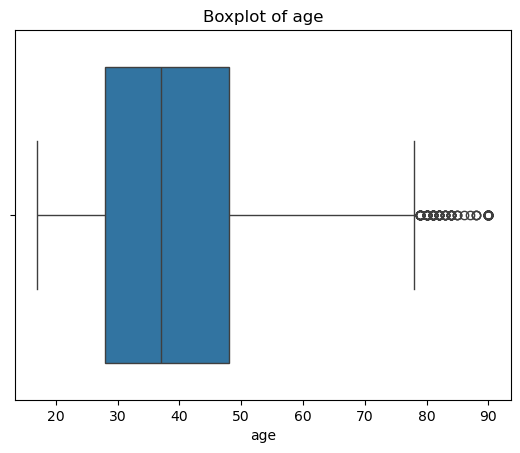

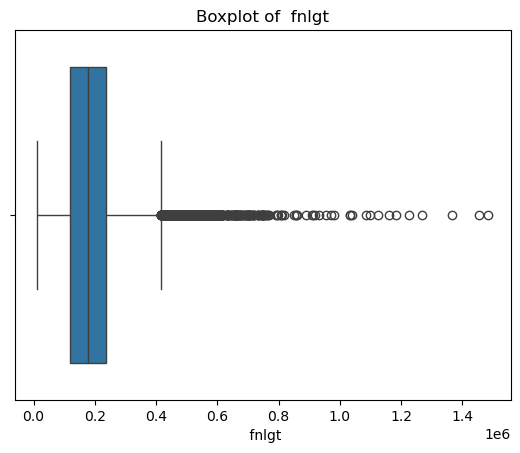

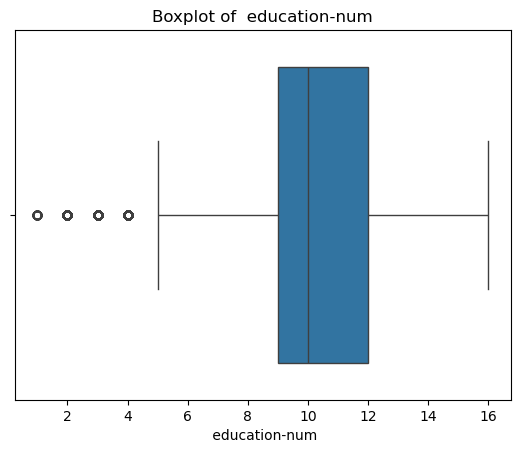

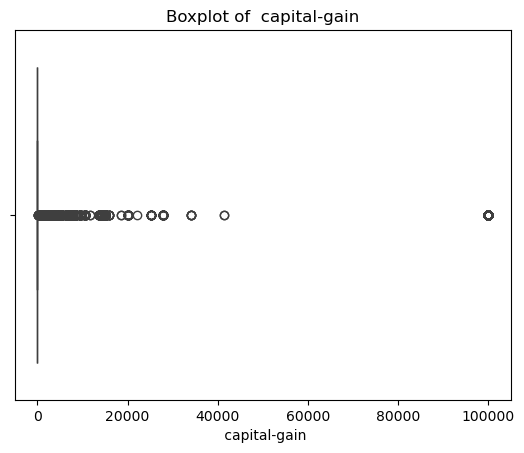

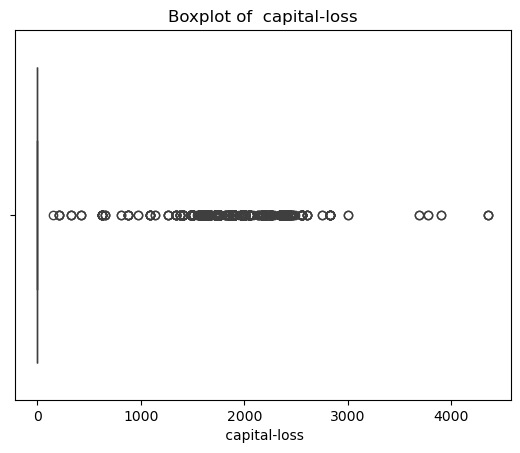

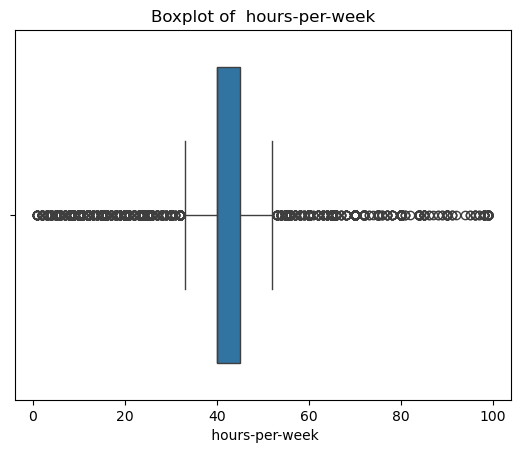

In [13]:
for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [ ]:
# first cleaning step as per assignemt - remove all blank spaces and overwrite the csv

In [17]:
with open("../data/census.csv", "r") as f:
    data = f.read()

data = data.replace(" ", "")  # remove all spaces

with open("../data/census.csv", "w") as f:
    f.write(data)